In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.uint8)

In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Preprocess the data
X = X / 255.0

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


In [10]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [11]:
# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, best_rf_model.predict(X_test_scaled)))

Random Forest Accuracy: 0.9682142857142857


In [12]:
from sklearn.metrics import classification_report
# Evaluate models
y_pred_rf = best_rf_model.predict(X_test_scaled)
# Print classification reports
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.96      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



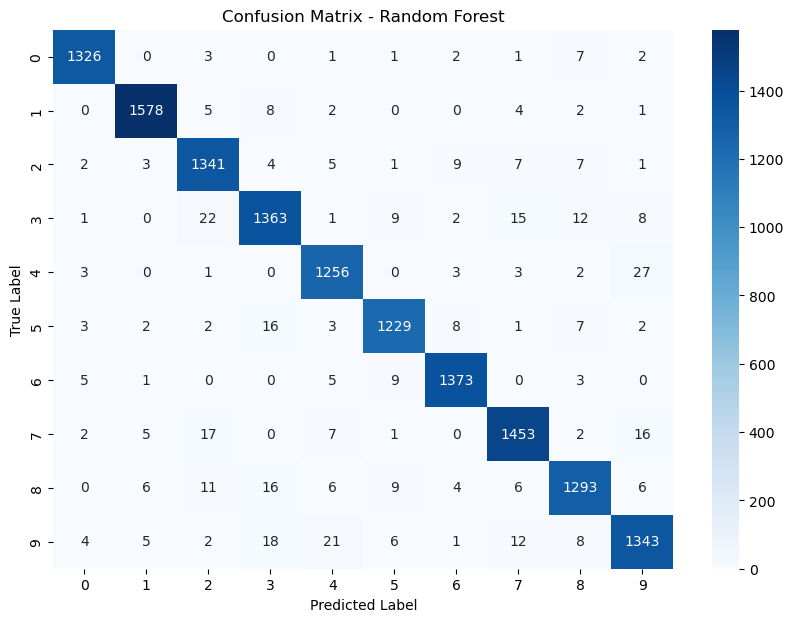

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameters and their possible values
param_grid_knn = {
    'n_neighbors': [3, 5, 10],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
}

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

# Print the best parameters found by grid search
print("Best parameters for KNN:", grid_search_knn.best_params_)

# Get the best KNN model
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best KNN model
knn_accuracy = accuracy_score(y_test, best_knn_model.predict(X_test_scaled))
print("KNN Accuracy:", knn_accuracy)


Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.9477857142857142


In [15]:
from sklearn.metrics import classification_report

# Evaluate the best KNN model
y_pred_knn = best_knn_model.predict(X_test_scaled)

# Generate classification report
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.96      0.99      0.98      1600
           2       0.95      0.94      0.95      1380
           3       0.94      0.95      0.94      1433
           4       0.95      0.93      0.94      1295
           5       0.94      0.94      0.94      1273
           6       0.97      0.98      0.97      1396
           7       0.94      0.93      0.93      1503
           8       0.96      0.91      0.93      1357
           9       0.90      0.93      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



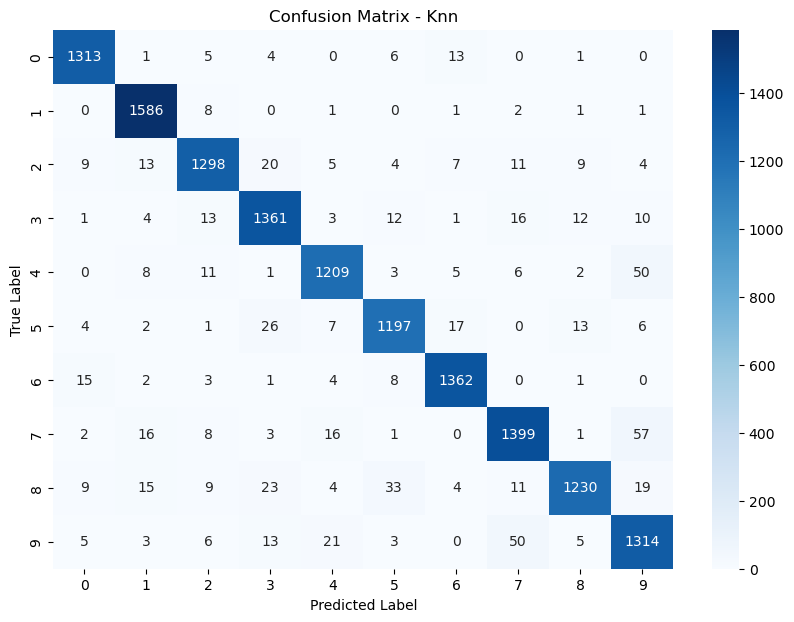

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for KNN
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)


# Plot confusion matrix heatmap using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Knn')
plt.show()

In [17]:
from sklearn.ensemble import VotingClassifier

# Define the tuned models
best_rf_model = grid_search_rf.best_estimator_
best_knn_model = grid_search_knn.best_estimator_

# Create a Voting Classifier with the tuned models
voting_classifier = VotingClassifier(
    estimators=[
        ('random_forest', best_rf_model),
        ('knn', best_knn_model),
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Fit the Voting Classifier to the training data
voting_classifier.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=3,
                                                   weights='distance'))])

In [18]:
# Evaluate the Voting Classifier
voting_accuracy = accuracy_score(y_test, voting_classifier.predict(X_test_scaled))
print("Voting Classifier Accuracy:", voting_accuracy)

Voting Classifier Accuracy: 0.9570714285714286


In [19]:
# Generate classification report for Voting Classifier
y_pred_voting = voting_classifier.predict(X_test_scaled)
print("Classification Report for Voting Classifier:")
print(classification_report(y_test, y_pred_voting))

Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1343
           1       0.95      0.99      0.97      1600
           2       0.94      0.97      0.95      1380
           3       0.93      0.96      0.95      1433
           4       0.94      0.97      0.95      1295
           5       0.95      0.95      0.95      1273
           6       0.99      0.97      0.98      1396
           7       0.95      0.96      0.95      1503
           8       0.98      0.90      0.94      1357
           9       0.98      0.90      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



In [21]:
# Evaluate on the test set
test_accuracy = accuracy_score(y_test, voting_classifier.predict(X_test_scaled))
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9570714285714286


In [25]:
import joblib
import cv2
import numpy as np
import streamlit as st

# Save the best models
joblib.dump(best_rf_model, 'best_rf_model.pkl')
joblib.dump(best_knn_model, 'best_knn_model.pkl')
joblib.dump(voting_classifier, 'voting_classifier.pkl')

# Function to preprocess the image
def preprocess_image(image):
    # Resize image to 28x28 pixels
    resized_image = cv2.resize(image, (28, 28))
    # Convert image to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    # Invert the colors (MNIST digits are white on black background)
    inverted_image = cv2.bitwise_not(gray_image)
    # Reshape the image to match MNIST data format (784 features)
    flattened_image = inverted_image.reshape(1, -1)
    # Scale pixel values to be between 0 and 1
    scaled_image = flattened_image / 255.0
    return scaled_image

# Streamlit UI
st.title('Handwritten Digit Recognition')

# Allow user to upload image or capture image from camera
image_file = st.file_uploader('Upload an image', type=['jpg', 'jpeg', 'png'])
if image_file is not None:
    # Read the image
    image = cv2.imdecode(np.fromstring(image_file.read(), np.uint8), 1)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    
    # Preprocess the image
    preprocessed_image = preprocess_image(image)
    
    # Make prediction
    prediction_rf = best_rf_model.predict(preprocessed_image)
    prediction_knn = best_knn_model.predict(preprocessed_image)
    prediction_voting = voting_classifier.predict(preprocessed_image)
    
    # Display the predictions
    st.write('Random Forest Prediction:', prediction_rf[0])
    st.write('KNN Prediction:', prediction_knn[0])
    st.write('Voting Classifier Prediction:', prediction_voting[0])

# Allow user to capture image from camera
if st.button('Capture Image'):
    # Access camera
    video_capture = cv2.VideoCapture(0)
    
    # Capture image
    ret, frame = video_capture.read()
    if ret:
        # Display captured image
        st.image(frame, caption='Captured Image', use_column_width=True)
        
        # Preprocess the captured image
        preprocessed_image = preprocess_image(frame)
        
        # Make prediction
        prediction_rf = best_rf_model.predict(preprocessed_image)
        prediction_knn = best_knn_model.predict(preprocessed_image)
        prediction_voting = voting_classifier.predict(preprocessed_image)
        
        # Display the predictions
        st.write('Random Forest Prediction:', prediction_rf[0])
        st.write('KNN Prediction:', prediction_knn[0])
        st.write('Voting Classifier Prediction:', prediction_voting[0])
        
    # Release the camera
    video_capture.release()


2024-03-21 23:50:19.172 
  command:

    streamlit run C:\Users\Imthias\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
